# Code demonstrating basic non-linear reduced rank models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg
import torch

from janelia_core.ml.reduced_rank_models import RRReluModel

## Setup ground truth model

In [3]:
d_in, d_out, d_latent, n_smps = 1000, 1000, 2, 10000

In [4]:
true_model = RRReluModel(d_in, d_out, d_latent)
true_model.generate_random_model(var_range=[.1, 1])

## Generate data

In [5]:
x = 3*torch.randn([n_smps, d_in])
y = true_model.generate(x)

## Create model we will fit to data

In [6]:
fitted_model = RRReluModel(d_in, d_out, d_latent)
fitted_model.init_weights(y, w_gain=.0001)
fitted_model.to('cuda')

RRReluModel()

## Fit model to data

In [7]:
adam_params = {'lr': .001, 'betas': [.9, .999]} # betas are for mean and second moment (.9, .999)
fitted_model.fit(x,y, batch_size=100, send_size=100,
                 max_its=20000, update_int=1000, adam_params=adam_params)

0: Elapsed time 0.3437652587890625, vl: 5770.541875
1000: Elapsed time 9.503480911254883, vl: 1669.6103125
2000: Elapsed time 18.59449005126953, vl: 861.888203125
3000: Elapsed time 27.697191953659058, vl: 622.07234375
4000: Elapsed time 36.91883182525635, vl: 456.88671875
5000: Elapsed time 46.482773780822754, vl: 330.9076953125
6000: Elapsed time 55.64137935638428, vl: 249.8975
7000: Elapsed time 65.22218751907349, vl: 199.54755859375
8000: Elapsed time 74.49032521247864, vl: 172.1240625
9000: Elapsed time 84.33168458938599, vl: 150.12154296875
10000: Elapsed time 93.4273841381073, vl: 141.97015625
11000: Elapsed time 102.53712558746338, vl: 137.166484375
12000: Elapsed time 111.67644190788269, vl: 131.1921875
13000: Elapsed time 120.77344298362732, vl: 129.05484375
14000: Elapsed time 129.8050513267517, vl: 125.223515625
15000: Elapsed time 139.00854992866516, vl: 122.47015625
16000: Elapsed time 148.05721831321716, vl: 128.94140625
17000: Elapsed time 157.13703060150146, vl: 122.66

## See fitted model results

RRReluModel()

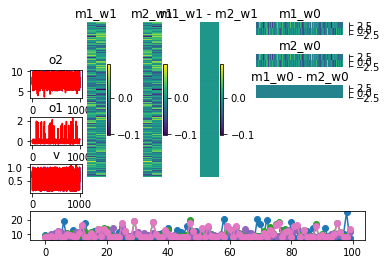

In [8]:
#%matplotlib qt
true_model.standardize()
fitted_model.standardize()
fitted_model.to('cpu')
RRReluModel.compare_models(true_model, fitted_model, x[0:100,:], [0,1,2,3])
fitted_model.to('cuda')

In [9]:
w0_true = true_model.w0.cpu().detach().numpy()
w1_true = true_model.w1.cpu().detach().numpy()

w0_fitted = fitted_model.w0.cpu().detach().numpy()
w1_fitted = fitted_model.w1.cpu().detach().numpy()

w_true = np.matmul(w1_true, w0_true.T)
w_fitted = np.matmul(w1_fitted, w0_fitted.T)

In [10]:
from janelia_core.visualization.matrix_visualization import cmp_n_mats

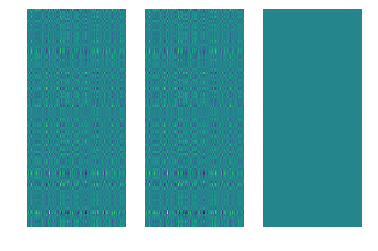

In [11]:
cmp_n_mats([w_true[0:100, 0:100], w_fitted[0:100, 0:100], w_true[0:100, 0:100]-w_fitted[0:100, 0:100]])